In [1]:
import numpy as np
import yfinance as yf
from scipy.stats import binom

# Fetch stock data
def get_stock_price(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="1d")
    return data['Close'].iloc[-1]  # Most recent closing price

# Cox-Ross-Rubinstein Binomial Tree Model
class CoxRossRubinstein:
    def __init__(self, S0, K, T, r, n, sigma, is_american=False):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.n = n
        self.sigma = sigma
        self.is_american = is_american
        self.dt = T/n  # Length of time interval
        self.df = np.exp(-r * self.dt)  # Discount factor per interval

        # Up and down factors
        self.u = np.exp(sigma * np.sqrt(self.dt))
        self.d = 1/self.u

    def option_price(self):
        # Calculate risk-neutral probability
        q = (np.exp(self.r * self.dt) - self.d) / (self.u - self.d)

        # Initialize asset prices at maturity - Binomial tree
        ST = np.asarray([self.S0 * self.u**j * self.d**(self.n - j) for j in range(self.n + 1)])

        # Initialize option values at maturity
        if self.is_american:
            val = np.asarray([max(0, s - self.K) for s in ST])  # For American Call
        else:
            val = np.maximum(ST - self.K, 0)  # For European Call

        # Backward induction for option price
        for i in range(self.n - 1, -1, -1):
            val[:-1] = np.exp(-self.r * self.dt) * (q * val[1:] + (1 - q) * val[:-1])
            
            # Check for early exercise for American Option
            if self.is_american:
                ST = ST[:len(val)] * self.u  # Move the stock price tree back one step
                val = np.maximum(val, ST - self.K)  # Compare to exercise value

        return val[0]

# Main Execution
if __name__ == "__main__":
    # Input parameters
    symbol = "AAPL"  # Symbol for Apple Inc.
    S0 = get_stock_price(symbol)  # Fetch current stock price
    K = 150  # Strike price
    T = 1  # Time to maturity in years
    r = 0.01  # Risk-free rate
    n = 3  # Number of periods
    sigma = 0.2  # Volatility
    is_american = False  # American or European Option

    # Initialize the model
    model = CoxRossRubinstein(S0, K, T, r, n, sigma, is_american)

    # Calculate option price
    option_price = model.option_price()
    print("Option Price: ", option_price)


ModuleNotFoundError: No module named 'yfinance'

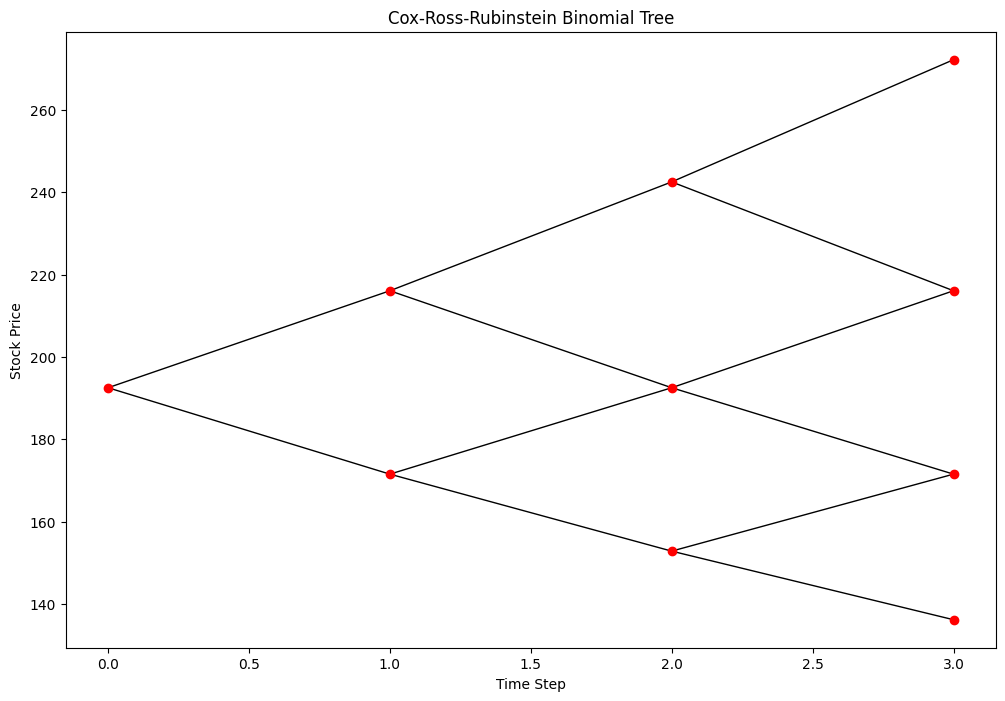

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data
def get_stock_price(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="1d")
    return data['Close'].iloc[-1]  # Most recent closing price

# Cox-Ross-Rubinstein Binomial Tree Model
class CoxRossRubinstein:
    def __init__(self, S0, K, T, r, n, sigma, is_american=False):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.n = n
        self.sigma = sigma
        self.is_american = is_american
        self.dt = T/n  # Length of time interval
        self.df = np.exp(-r * self.dt)  # Discount factor per interval

        # Up and down factors
        self.u = np.exp(sigma * np.sqrt(self.dt))
        self.d = 1/self.u

    def build_tree(self):
        tree = np.zeros((self.n+1, self.n+1))
        for i in range(self.n + 1):
            for j in range(i + 1):
                tree[j, i] = self.S0 * (self.u ** (i - j)) * (self.d ** j)
        return tree

    def plot_tree(self, tree):
        plt.figure(figsize=(12, 8))
        for i in range(self.n + 1):
            for j in range(i + 1):
                if i < self.n:
                    # Plot lines for next movement
                    plt.plot([i, i + 1], [tree[j, i], tree[j, i + 1]], 'k-', lw=1)  # up
                    plt.plot([i, i + 1], [tree[j, i], tree[j + 1, i + 1]], 'k-', lw=1)  # down
                plt.plot(i, tree[j, i], 'ro')  # Plot nodes
        
        plt.title("Cox-Ross-Rubinstein Binomial Tree")
        plt.xlabel("Time Step")
        plt.ylabel("Stock Price")
        plt.show()

# Main Execution
if __name__ == "__main__":
    # Input parameters
    symbol = "AAPL"  # Symbol for Apple Inc.
    S0 = get_stock_price(symbol)  # Fetch current stock price
    K = 150  # Strike price
    T = 1  # Time to maturity in years
    r = 0.01  # Risk-free rate
    n = 3  # Number of periods
    sigma = 0.2  # Volatility
    is_american = False  # American or European Option

    # Initialize the model
    model = CoxRossRubinstein(S0, K, T, r, n, sigma, is_american)

    # Build and Plot the tree
    tree = model.build_tree()
    model.plot_tree(tree)


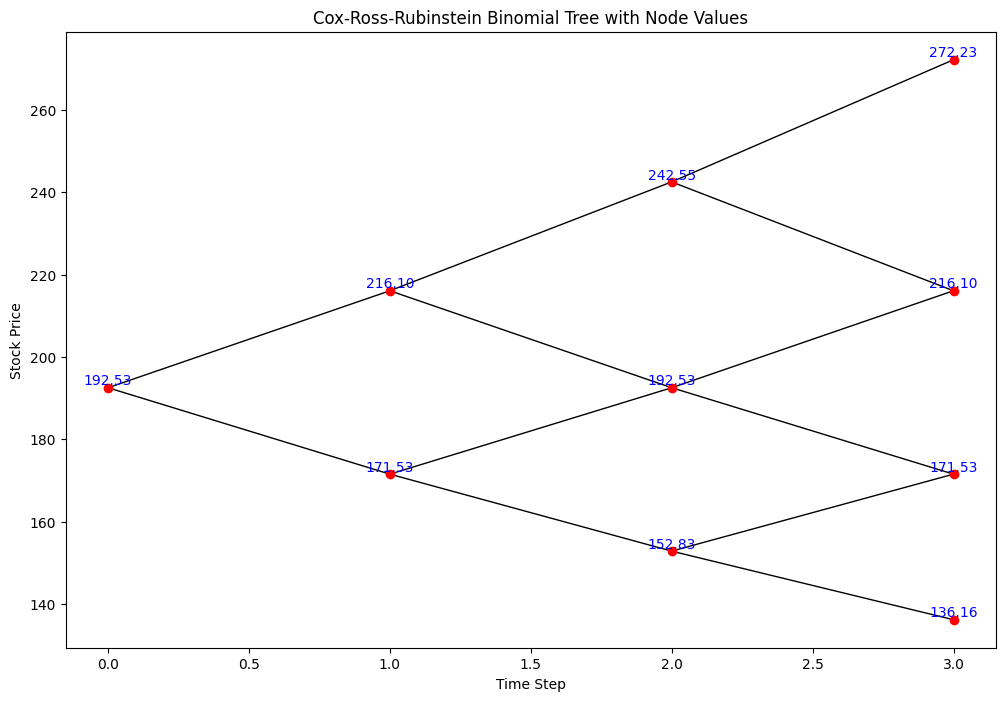

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data
def get_stock_price(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="1d")
    return data['Close'].iloc[-1]  # Most recent closing price

# Cox-Ross-Rubinstein Binomial Tree Model
class CoxRossRubinstein:
    def __init__(self, S0, K, T, r, n, sigma, is_american=False):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.n = n
        self.sigma = sigma
        self.is_american = is_american
        self.dt = T/n  # Length of time interval
        self.df = np.exp(-r * self.dt)  # Discount factor per interval

        # Up and down factors
        self.u = np.exp(sigma * np.sqrt(self.dt))
        self.d = 1/self.u

    def build_tree(self):
        tree = np.zeros((self.n+1, self.n+1))
        for i in range(self.n + 1):
            for j in range(i + 1):
                tree[j, i] = self.S0 * (self.u ** (i - j)) * (self.d ** j)
        return tree

    def plot_tree(self, tree):
        plt.figure(figsize=(12, 8))
        for i in range(self.n + 1):
            for j in range(i + 1):
                if i < self.n:
                    # Plot lines for next movement
                    plt.plot([i, i + 1], [tree[j, i], tree[j, i + 1]], 'k-', lw=1)  # up
                    plt.plot([i, i + 1], [tree[j, i], tree[j + 1, i + 1]], 'k-', lw=1)  # down
                plt.plot(i, tree[j, i], 'ro')  # Plot nodes
                plt.text(i, tree[j, i], f"{tree[j, i]:.2f}", color='blue', ha='center', va='bottom')  # Display value

        plt.title("Cox-Ross-Rubinstein Binomial Tree with Node Values")
        plt.xlabel("Time Step")
        plt.ylabel("Stock Price")
        plt.show()

# Main Execution
if __name__ == "__main__":
    # Input parameters
    symbol = "AAPL"  # Symbol for Apple Inc.
    S0 = get_stock_price(symbol)  # Fetch current stock price
    K = 150  # Strike price
    T = 1  # Time to maturity in years
    r = 0.01  # Risk-free rate
    n = 3  # Number of periods
    sigma = 0.2  # Volatility
    is_american = False  # American or European Option

    # Initialize the model
    model = CoxRossRubinstein(S0, K, T, r, n, sigma, is_american)

    # Build and Plot the tree
    tree = model.build_tree()
    model.plot_tree(tree)


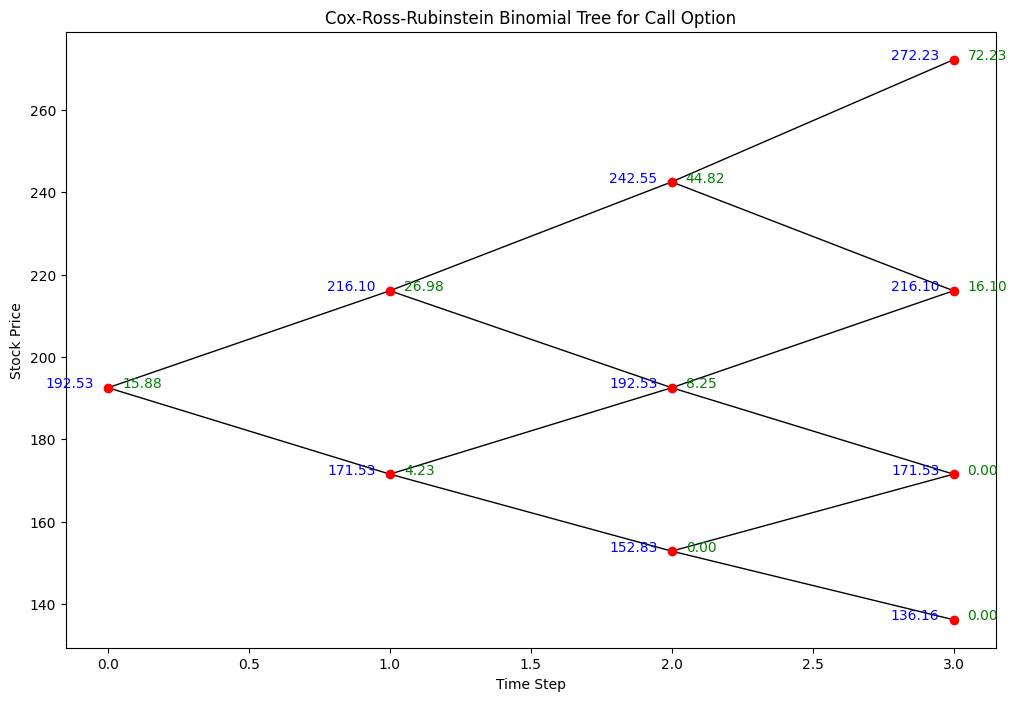

In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data
def get_stock_price(symbol):
    stock = yf.Ticker(symbol)
    data = stock.history(period="1d")
    return data['Close'].iloc[-1]  # Most recent closing price

# Cox-Ross-Rubinstein Binomial Tree Model for Call Option
class CoxRossRubinstein:
    def __init__(self, S0, K, T, r, n, sigma, is_american=False):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.n = n
        self.sigma = sigma
        self.is_american = is_american
        self.dt = T/n  # Length of time interval
        self.df = np.exp(-r * self.dt)  # Discount factor per interval

        # Up and down factors
        self.u = np.exp(sigma * np.sqrt(self.dt))
        self.d = 1/self.u

    def build_tree(self):
        tree = np.zeros((self.n+1, self.n+1))
        for i in range(self.n + 1):
            for j in range(i + 1):
                tree[j, i] = self.S0 * (self.u ** (i - j)) * (self.d ** j)
        return tree

    def option_valuation(self, tree):
        # Calculate risk-neutral probability
        q = (np.exp(self.r * self.dt) - self.d) / (self.u - self.d)
        option_tree = np.zeros_like(tree)  # Initialize the option price tree

        # Initialize option values at maturity (payoffs for call option)
        option_tree[:, self.n] = np.maximum(tree[:, self.n] - self.K, 0)

        # Backward induction for option price
        for i in range(self.n - 1, -1, -1):
            option_tree[:i+1, i] = np.exp(-self.r * self.dt) * (q * option_tree[1:i+2, i+1] + (1 - q) * option_tree[:i+1, i+1])

            # For American Option, consider the possibility of early exercise
            if self.is_american:
                option_tree[:i+1, i] = np.maximum(option_tree[:i+1, i], tree[:i+1, i] - self.K)

        return option_tree

    def plot_tree(self, tree, option_tree):
        plt.figure(figsize=(12, 8))
        for i in range(self.n + 1):
            for j in range(i + 1):
                if i < self.n:
                    # Plot lines for next movement
                    plt.plot([i, i + 1], [tree[j, i], tree[j, i + 1]], 'k-', lw=1)  # up
                    plt.plot([i, i + 1], [tree[j, i], tree[j + 1, i + 1]], 'k-', lw=1)  # down
                plt.plot(i, tree[j, i], 'ro')  # Plot nodes
                # Stock price value
                plt.text(i - 0.05, tree[j, i], f"{tree[j, i]:.2f}", color='blue', ha='right')  
                # Option price value
                plt.text(i + 0.05, tree[j, i], f"{option_tree[j, i]:.2f}", color='green', ha='left')  

        plt.title("Cox-Ross-Rubinstein Binomial Tree for Call Option")
        plt.xlabel("Time Step")
        plt.ylabel("Stock Price")
        plt.show()

# Main Execution
if __name__ == "__main__":
    # Input parameters
    symbol = "AAPL"  # Symbol for Apple Inc.
    S0 = get_stock_price(symbol)  # Fetch current stock price
    K = 200  # Strike price for the call option
    T = 1  # Time to maturity in years
    r = 0.01  # Risk-free rate
    n = 3  # Number of periods
    sigma = 0.2  # Volatility
    is_american = False  # Set to True for American options

    # Initialize the model
    model = CoxRossRubinstein(S0, K, T, r, n, sigma, is_american)

    # Build the stock price tree
    stock_tree = model.build_tree()

    # Calculate option prices for each node
    option_tree = model.option_valuation(stock_tree)

    # Plot the tree with both stock and option prices
    model.plot_tree(stock_tree, option_tree)


[*********************100%%**********************]  1 of 1 completed


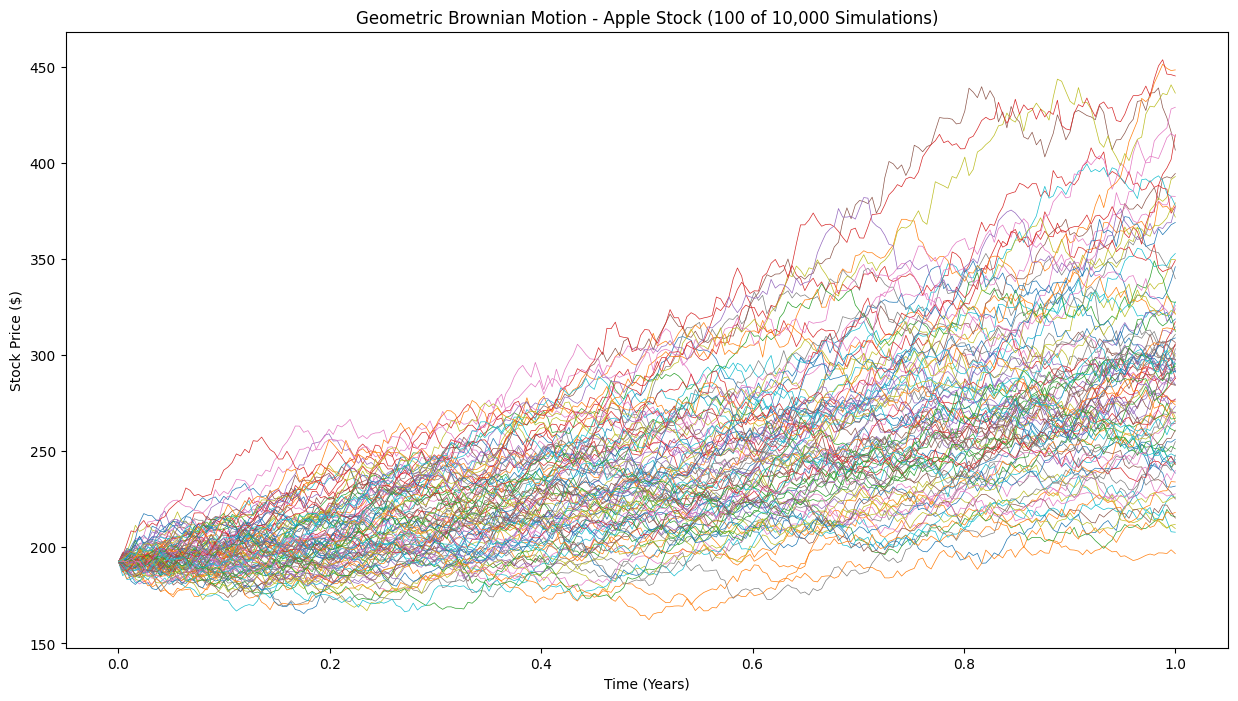

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data for Apple
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")  # Modify dates as needed
S0 = data['Close'].iloc[-1]  # Latest closing price

# Calculate daily returns and annualized volatility
log_returns = np.log(data['Close'] / data['Close'].shift(1))
mu = log_returns.mean() * 252  # Annualized mean
sigma = log_returns.std() * np.sqrt(252)  # Annualized volatility

# Parameters for GBM
T = 1.0      # time horizon in years
dt = 1/252   # time step (trading days)
n = 10000    # number of simulations

# Time array from 0 to T, equally spaced in intervals of dt
t = np.linspace(0, T, int(T / dt))

# Number of time steps
m = len(t)

# Simulate random increments (Brownian motion)
dW = np.random.normal(0, np.sqrt(dt), (n, m))

# Calculate the stock price path
St = np.zeros((n, m))
St[:, 0] = S0

for i in range(1, m):
    St[:, i] = St[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[:, i])

# Plot the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, St[i], lw=0.5)

plt.title('Geometric Brownian Motion - Apple Stock (100 of 10,000 Simulations)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.show()


[*********************100%%**********************]  1 of 1 completed


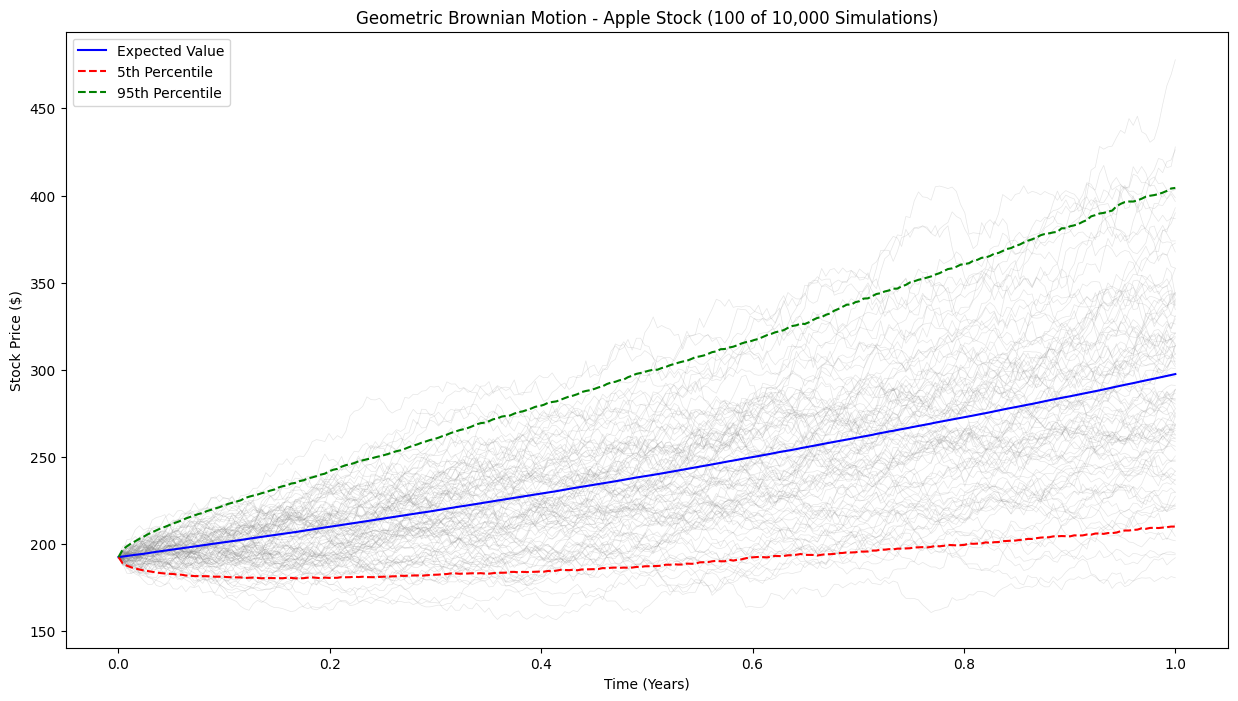

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data for Apple
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")  # Modify dates as needed
S0 = data['Close'].iloc[-1]  # Latest closing price

# Calculate daily returns and annualized volatility
log_returns = np.log(data['Close'] / data['Close'].shift(1))
mu = log_returns.mean() * 252  # Annualized mean
sigma = log_returns.std() * np.sqrt(252)  # Annualized volatility

# Parameters for GBM
T = 1.0      # time horizon in years
dt = 1/252   # time step (trading days)
n = 10000    # number of simulations

# Time array from 0 to T, equally spaced in intervals of dt
t = np.linspace(0, T, int(T / dt))

# Number of time steps
m = len(t)

# Simulate random increments (Brownian motion)
dW = np.random.normal(0, np.sqrt(dt), (n, m))

# Calculate the stock price path
St = np.zeros((n, m))
St[:, 0] = S0

for i in range(1, m):
    St[:, i] = St[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[:, i])

# Calculate statistics for each time step
expected_value = np.mean(St, axis=0)
percentile_5 = np.percentile(St, 5, axis=0)
percentile_95 = np.percentile(St, 95, axis=0)

# Plot the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, St[i], lw=0.5, color='gray', alpha=0.2)

# Plot expected value and percentiles
plt.plot(t, expected_value, 'b', label='Expected Value')
plt.plot(t, percentile_5, 'r--', label='5th Percentile')
plt.plot(t, percentile_95, 'g--', label='95th Percentile')

plt.title('Geometric Brownian Motion - Apple Stock (100 of 10,000 Simulations)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


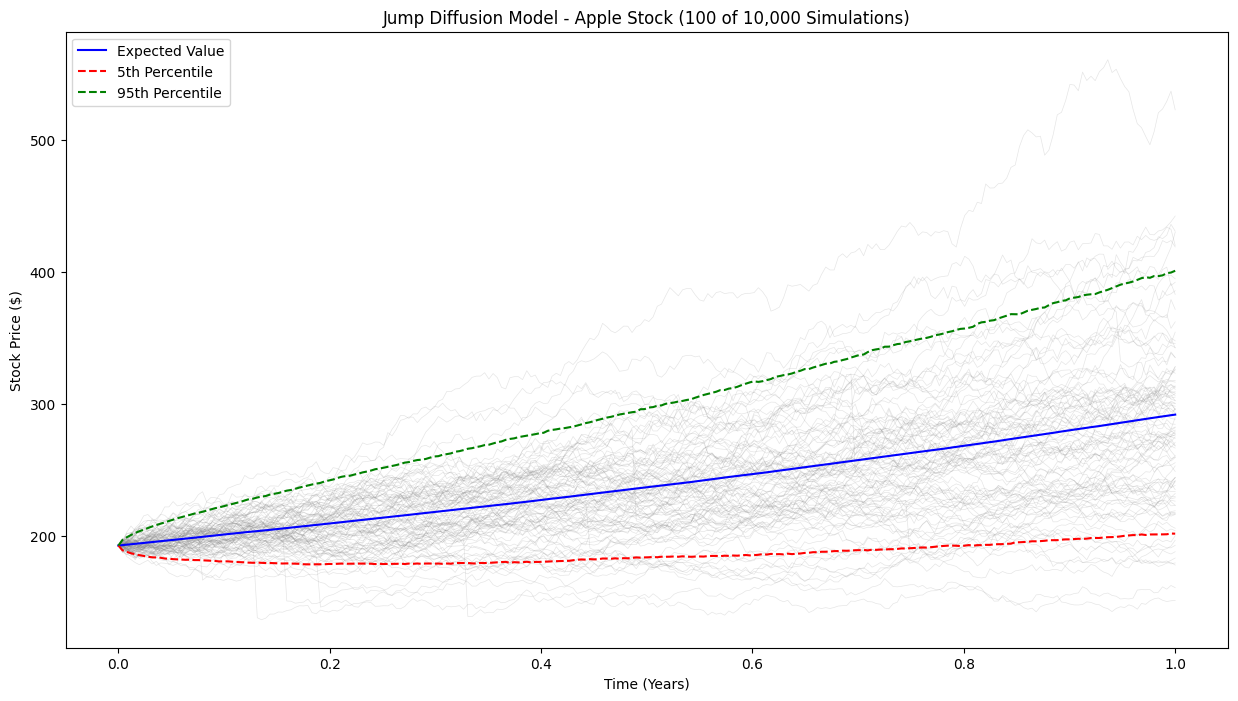

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data for Apple
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")  # Modify dates as needed
S0 = data['Close'].iloc[-1]  # Latest closing price

# Calculate daily returns and annualized volatility for GBM part
log_returns = np.log(data['Close'] / data['Close'].shift(1))
mu = log_returns.mean() * 252  # Annualized mean
sigma = log_returns.std() * np.sqrt(252)  # Annualized volatility

# Parameters for Jump Diffusion
lambda_ = 0.1  # Intensity of jumps, i.e., average number of jumps per year
mu_J = -0.2    # Mean of jump size
sigma_J = 0.1  # Standard deviation of jump size

# Simulation parameters
T = 1.0       # time horizon in years
dt = 1/252    # time step (trading days)
n = 10000     # number of simulations

# Time array from 0 to T, equally spaced in intervals of dt
t = np.linspace(0, T, int(T / dt))

# Number of time steps
m = len(t)

# Simulate random increments (Brownian motion)
dW = np.random.normal(0, np.sqrt(dt), (n, m))
J = np.random.normal(mu_J, sigma_J, (n, m)) * (np.random.poisson(lambda_ * dt, (n, m)) > 0)  # Jump component

# Calculate the stock price path
St = np.zeros((n, m))
St[:, 0] = S0

for i in range(1, m):
    St[:, i] = St[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[:, i]) * np.exp(J[:, i])

# Calculate statistics for each time step
expected_value = np.mean(St, axis=0)
percentile_5 = np.percentile(St, 5, axis=0)
percentile_95 = np.percentile(St, 95, axis=0)

# Plot the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, St[i], lw=0.5, color='gray', alpha=0.2)

# Plot expected value and percentiles
plt.plot(t, expected_value, 'b', label='Expected Value')
plt.plot(t, percentile_5, 'r--', label='5th Percentile')
plt.plot(t, percentile_95, 'g--', label='95th Percentile')

plt.title('Jump Diffusion Model - Apple Stock (100 of 10,000 Simulations)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()


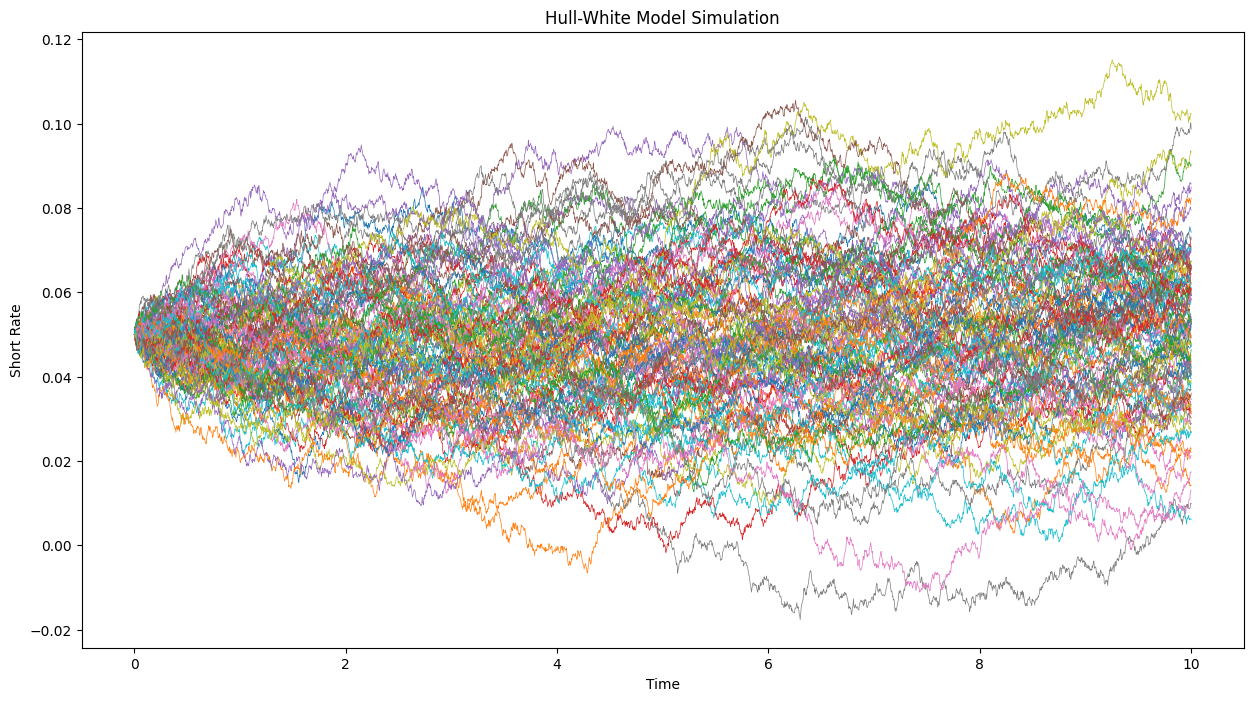

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Hull-White Model Parameters
a = 0.1          # Speed of mean reversion
sigma = 0.01     # Volatility of the short rate
r0 = 0.05        # Initial short rate

# Time parameters
T = 10           # Time horizon
dt = 1/252       # Time step
t = np.linspace(0, T, int(T/dt))  # Time array

# Number of simulations
n_simulations = 1000

# Function for theta(t) - here assumed to be a constant for simplicity
# In practice, this would be calibrated to fit the term structure of interest rates
def theta(t):
    return 0.05

# Simulate interest rate paths
r_t = np.zeros((n_simulations, len(t)))
r_t[:, 0] = r0

for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    dW = np.random.normal(0, np.sqrt(dt), n_simulations)
    r_t[:, i] = r_t[:, i-1] + a * (theta(t[i-1]) - r_t[:, i-1]) * dt + sigma * dW

# Plotting the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, r_t[i], lw=0.5)

plt.title('Hull-White Model Simulation')
plt.xlabel('Time')
plt.ylabel('Short Rate')
plt.show()


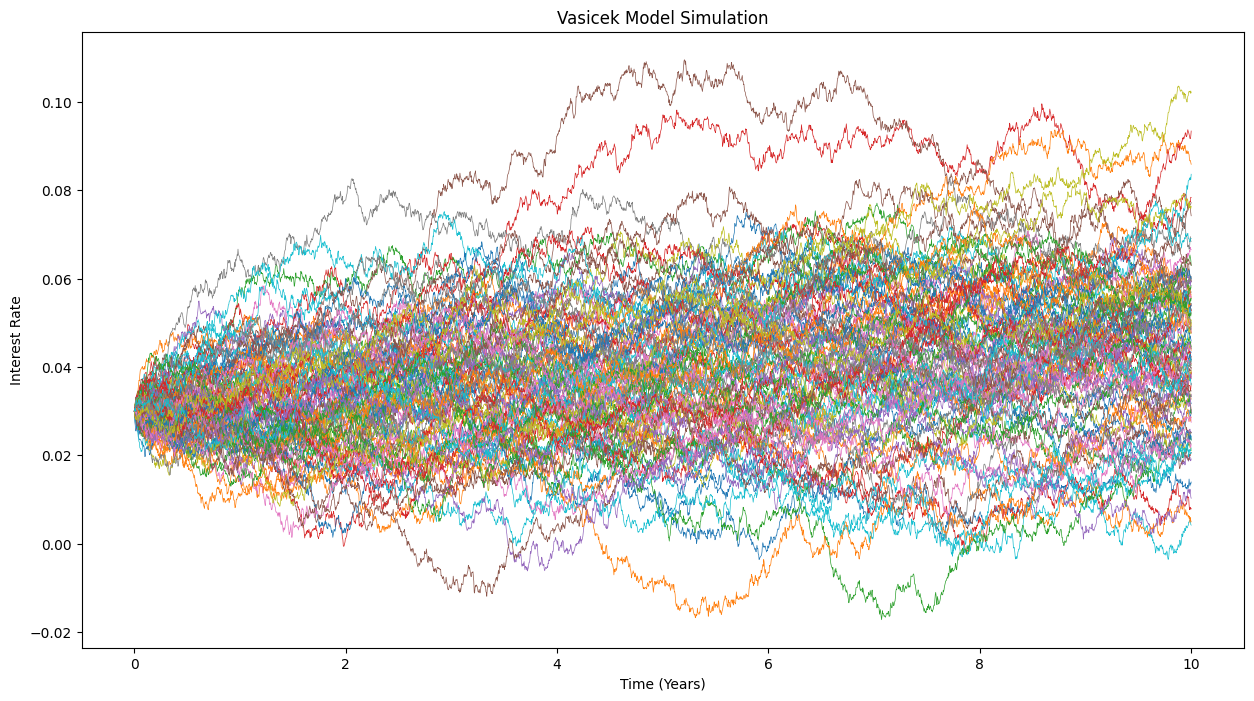

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek Model Parameters
a = 0.1          # Speed of mean reversion
b = 0.05         # Long-term mean level
sigma = 0.01     # Volatility
r0 = 0.03        # Initial interest rate

# Time parameters
T = 10           # Time horizon in years
dt = 1/252       # Time step (you might use days as a standard financial market convention)
n_steps = int(T / dt)  # Number of time steps
t = np.linspace(0, T, n_steps)  # Time array

# Number of simulations
n_simulations = 1000

# Initialize rate array
r_t = np.zeros((n_simulations, n_steps))
r_t[:, 0] = r0

# Simulate interest rate paths
for i in range(1, n_steps):
    dW = np.random.normal(0, np.sqrt(dt), n_simulations)  # Wiener increments
    r_t[:, i] = r_t[:, i-1] + a * (b - r_t[:, i-1]) * dt + sigma * dW

# Plotting the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, r_t[i], lw=0.5)

plt.title('Vasicek Model Simulation')
plt.xlabel('Time (Years)')
plt.ylabel('Interest Rate')
plt.show()


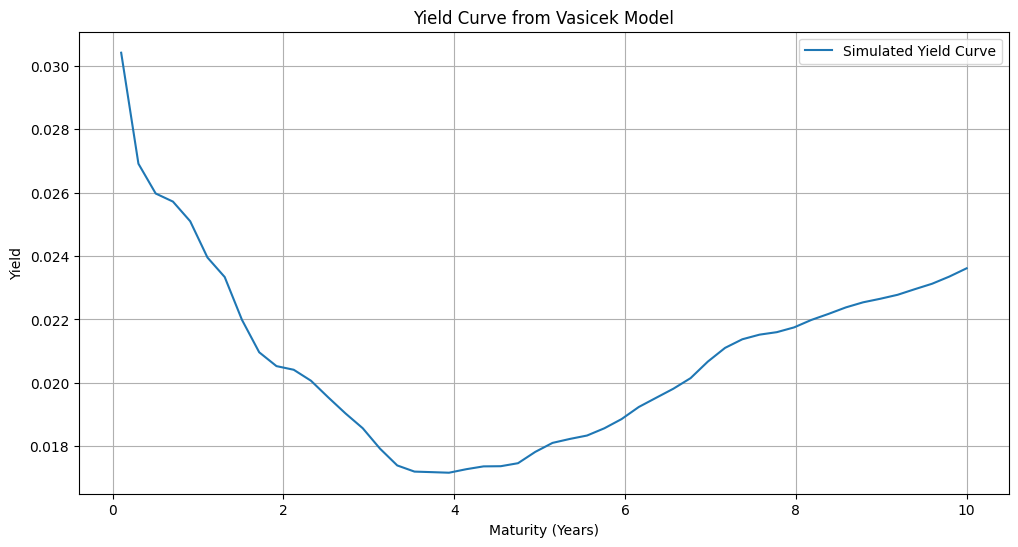

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek model parameters
a = 0.1  # Speed of mean reversion
b = 0.05  # Long term mean level
sigma = 0.01  # Volatility of short rate
r0 = 0.03  # Initial interest rate

# Simulation parameters
T = 10  # Time horizon for simulation
dt = 1/252  # Time step
N = int(T/dt)  # Total number of time steps
times = np.linspace(0, T, N)

# Initialize short rate array
r_t = np.zeros(N)
r_t[0] = r0

# Simulate short rate using the Euler-Maruyama method
for i in range(1, N):
    dr = a * (b - r_t[i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    r_t[i] = r_t[i-1] + dr

# Calculate bond prices from short rates for various maturities
maturities = np.linspace(0.1, 10, 50)  # Maturities from 0.1 to 10 years
yields = np.zeros_like(maturities)

for i, T in enumerate(maturities):
    # Calculate bond price as the present value of future payments
    integral_r = np.sum(r_t[:int(T/dt)]) * dt
    bond_price = np.exp(-integral_r)
    # Convert bond price to yield
    yields[i] = -np.log(bond_price) / T

# Plotting the yield curve
plt.figure(figsize=(12, 6))
plt.plot(maturities, yields, label="Simulated Yield Curve")
plt.title("Yield Curve from Vasicek Model")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield")
plt.legend()
plt.grid(True)
plt.show()


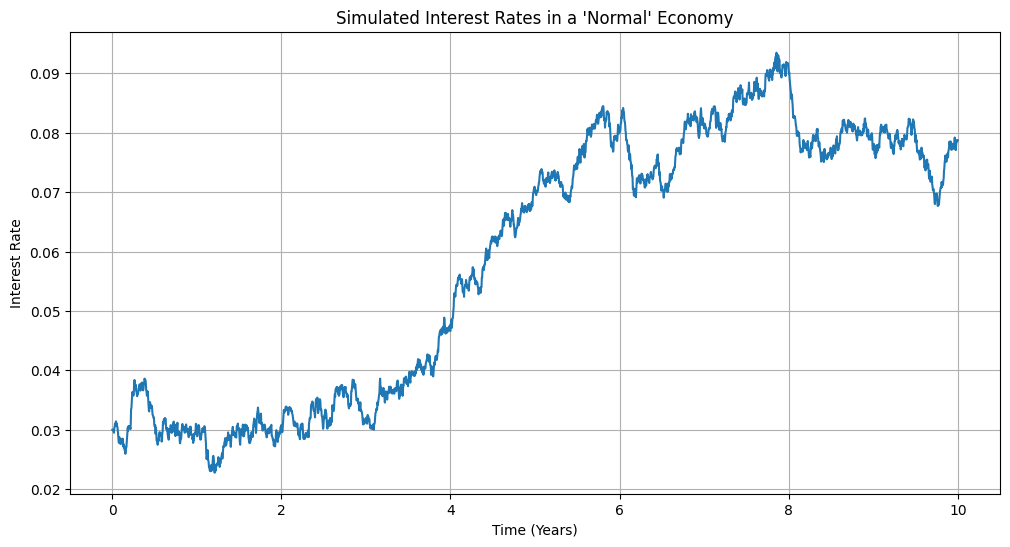

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek model parameters for a "normal" economy
a = 0.1  # Moderate speed of mean reversion
b = 0.05  # Long-term mean level, reflecting a typical interest rate level
sigma = 0.01  # Moderate volatility
r0 = 0.03  # Initial interest rate close to the long-term mean

# Simulation parameters
T = 10  # Time horizon for simulation
dt = 1/252  # Time step
N = int(T/dt)  # Total number of time steps
times = np.linspace(0, T, N)

# Initialize short rate array
r_t = np.zeros(N)
r_t[0] = r0

# Simulate short rate using the Euler-Maruyama method
for i in range(1, N):
    dr = a * (b - r_t[i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    r_t[i] = r_t[i-1] + dr

# Plotting the short rate evolution
plt.figure(figsize=(12, 6))
plt.plot(times, r_t)
plt.title("Simulated Interest Rates in a 'Normal' Economy")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.grid(True)
plt.show()


In [3]:
import numpy as np

# Vasicek model parameters (example values, typically obtained through calibration)
a = 0.1        # Speed of mean reversion
b = 0.05       # Long term mean level
sigma = 0.01   # Volatility of the short rate
r0 = 0.03      # Current short rate

# Bond parameters
T = 5  # Maturity of the bond in years
t = 0  # Current time

# Calculate B(t, T)
B = (1 - np.exp(-a * (T-t))) / a

# Calculate A(t, T)
A = np.exp((b - sigma**2 / (2 * a**2)) * (B - (T-t)) - (sigma**2 / (4 * a)) * B**2)

# Calculate the bond price
bond_price = A * np.exp(-B * r0)

print(f"The price of the zero-coupon bond with maturity {T} years is: {bond_price}")


The price of the zero-coupon bond with maturity 5 years is: 0.8437913319329629


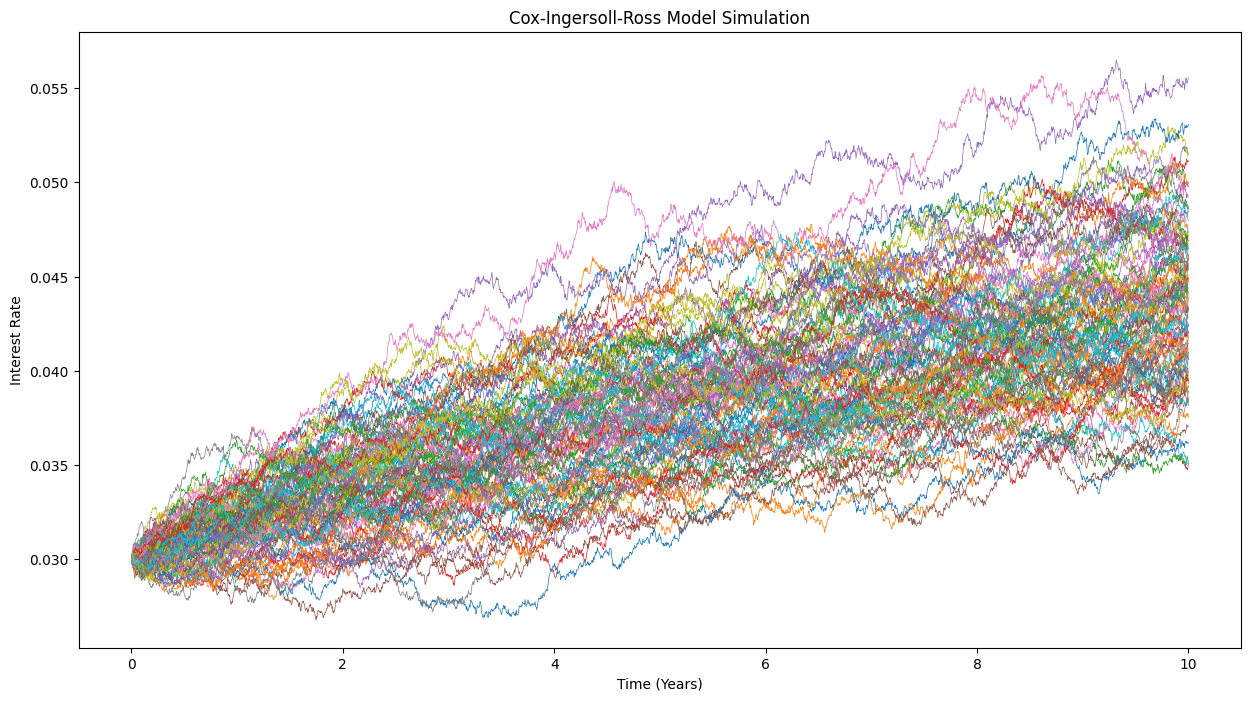

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Cox-Ingersoll-Ross Model Parameters
a = 0.1          # Speed of mean reversion
b = 0.05         # Long-term mean level
sigma = 0.01     # Volatility
r0 = 0.03        # Initial interest rate

# Time parameters
T = 10           # Time horizon in years
dt = 1/252       # Time step (you might use days as a standard financial market convention)
n_steps = int(T / dt)  # Number of time steps
t = np.linspace(0, T, n_steps)  # Time array

# Number of simulations
n_simulations = 1000

# Initialize rate array
r_t = np.zeros((n_simulations, n_steps))
r_t[:, 0] = r0

# Simulate interest rate paths
for i in range(1, n_steps):
    dW = np.random.normal(0, np.sqrt(dt), n_simulations)  # Wiener increments
    # Ensure that rates don't go negative
    sqrt_r_t = np.sqrt(np.maximum(r_t[:, i-1], 0))
    r_t[:, i] = r_t[:, i-1] + a * (b - r_t[:, i-1]) * dt + sigma * sqrt_r_t * dW

# Plotting the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, r_t[i], lw=0.5)

plt.title('Cox-Ingersoll-Ross Model Simulation')
plt.xlabel('Time (Years)')
plt.ylabel('Interest Rate')
plt.show()


[*********************100%%**********************]  1 of 1 completed


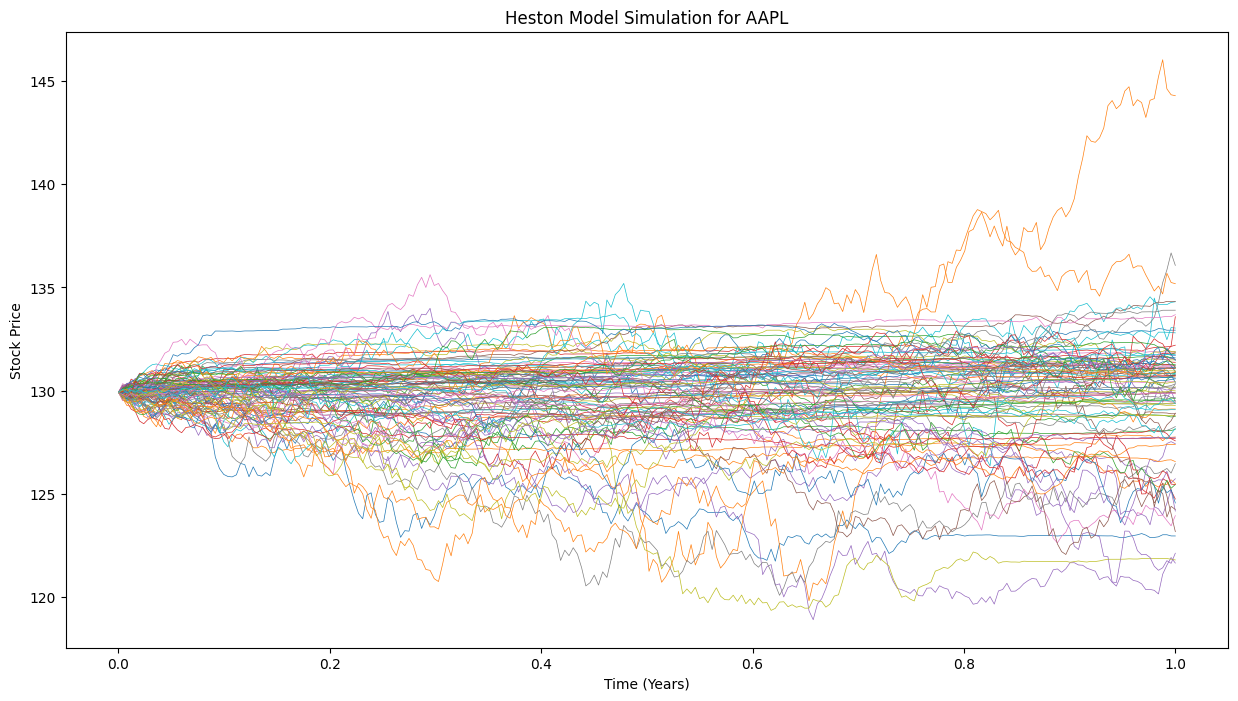

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data for an asset, e.g., Apple
ticker = "AAPL"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
prices = data['Close'].values

# Estimate initial parameters from historical data
mu = np.mean(np.diff(np.log(prices)))  # Drift term from log return mean
S0 = prices[-1]  # Initial stock price
v0 = np.var(np.diff(np.log(prices)))  # Initial variance from log return variance

# Heston Model Parameters
kappa = 1.0         # Speed of mean reversion for variance
theta = v0          # Long-term variance
sigma = 0.1         # Volatility of the volatility
rho = -0.5          # Correlation between asset and volatility

# Time parameters
T = 1.0            # Time horizon in years
dt = 1/252         # Time step (trading days)
n_steps = int(T / dt)
t = np.linspace(0, T, n_steps)

# Number of simulations
n_simulations = 1000

# Initialize asset price and variance arrays
S_t = np.zeros((n_simulations, n_steps))
v_t = np.zeros((n_simulations, n_steps))
S_t[:, 0] = S0
v_t[:, 0] = v0

# Simulate paths
for i in range(1, n_steps):
    delta_W_S = np.random.normal(0, np.sqrt(dt), n_simulations)  # dW for S_t
    delta_W_v = np.random.normal(0, np.sqrt(dt), n_simulations)  # dW for v_t
    # Correlate the two Wiener processes
    delta_W_S = rho * delta_W_v + np.sqrt(1 - rho**2) * delta_W_S
    
    # Ensure non-negative variance
    v_t[:, i] = np.maximum(v_t[:, i-1] + kappa * (theta - v_t[:, i-1]) * dt + sigma * np.sqrt(np.maximum(v_t[:, i-1], 0)) * delta_W_v, 0)
    S_t[:, i] = S_t[:, i-1] * np.exp((mu - 0.5 * v_t[:, i-1]) * dt + np.sqrt(v_t[:, i-1]) * delta_W_S)

# Plotting the first 100 paths
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, S_t[i], lw=0.5)

plt.title('Heston Model Simulation for AAPL')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed


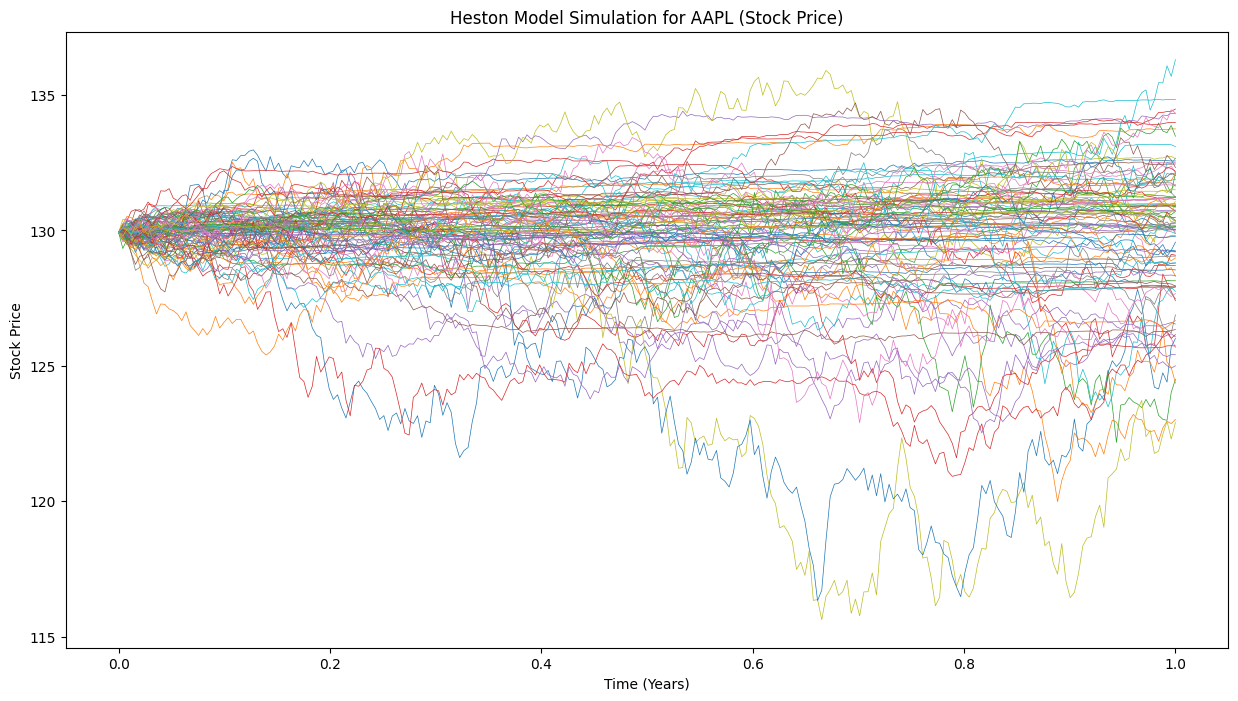

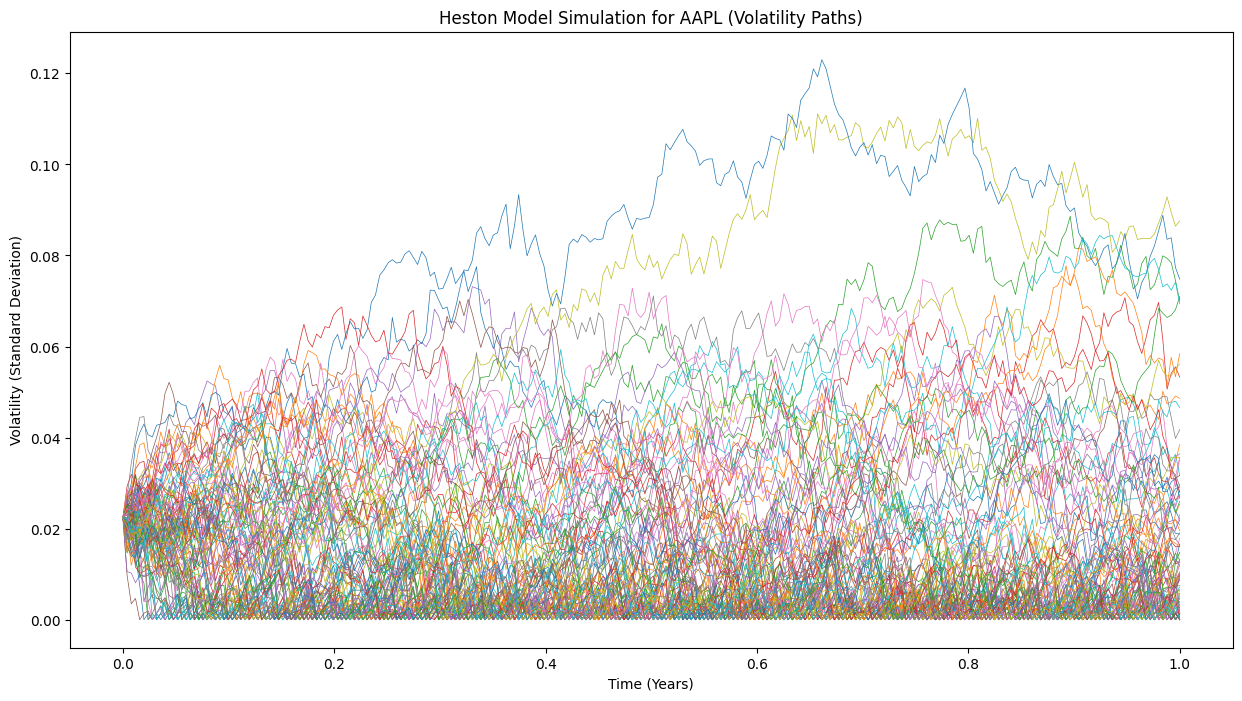

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data for an asset, e.g., Apple
ticker = "AAPL"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
prices = data['Close'].values

# Estimate initial parameters from historical data
mu = np.mean(np.diff(np.log(prices)))  # Drift term from log return mean
S0 = prices[-1]  # Initial stock price
v0 = np.var(np.diff(np.log(prices)))  # Initial variance from log return variance

# Heston Model Parameters
kappa = 1.0         # Speed of mean reversion for variance
theta = v0          # Long-term variance
sigma = 0.1         # Volatility of the volatility
rho = -0.5          # Correlation between asset and volatility

# Time parameters
T = 1.0            # Time horizon in years
dt = 1/252         # Time step (trading days)
n_steps = int(T / dt)
t = np.linspace(0, T, n_steps)

# Number of simulations
n_simulations = 1000

# Initialize asset price and variance arrays
S_t = np.zeros((n_simulations, n_steps))
v_t = np.zeros((n_simulations, n_steps))
S_t[:, 0] = S0
v_t[:, 0] = v0

# Simulate paths
for i in range(1, n_steps):
    delta_W_S = np.random.normal(0, np.sqrt(dt), n_simulations)  # dW for S_t
    delta_W_v = np.random.normal(0, np.sqrt(dt), n_simulations)  # dW for v_t
    # Correlate the two Wiener processes
    delta_W_S = rho * delta_W_v + np.sqrt(1 - rho**2) * delta_W_S
    
    # Ensure non-negative variance
    v_t[:, i] = np.maximum(v_t[:, i-1] + kappa * (theta - v_t[:, i-1]) * dt + sigma * np.sqrt(np.maximum(v_t[:, i-1], 0)) * delta_W_v, 0)
    S_t[:, i] = S_t[:, i-1] * np.exp((mu - 0.5 * v_t[:, i-1]) * dt + np.sqrt(v_t[:, i-1]) * delta_W_S)

# Plotting the first 100 paths of the stock price
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, S_t[i], lw=0.5)

plt.title('Heston Model Simulation for AAPL (Stock Price)')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.show()

# Plotting the first 100 paths of the volatility (standard deviation)
plt.figure(figsize=(15, 8))
for i in range(100):
    plt.plot(t, np.sqrt(v_t[i]), lw=0.5)  # Plotting the square root of variance

plt.title('Heston Model Simulation for AAPL (Volatility Paths)')
plt.xlabel('Time (Years)')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Assume these are the Heston model parameters from either assumption or calibration
params = {
    "v0": 0.01,  # initial variance
    "kappa": 0.5,  # speed of mean reversion
    "theta": 0.02,  # long-term variance
    "rho": -0.7,  # correlation between asset and volatility
    "sigma": 0.1,  # volatility of volatility
}

# Define a range of strikes and maturities for which you want to calculate implied volatilities
strikes = np.linspace(80, 120, 10)  # example strike prices
maturities = np.linspace(0.1, 2, 10)  # example maturities in years

# Placeholder for the implied volatility surface
iv_surface = np.zeros((len(strikes), len(maturities)))

# The following loop is conceptual and represents what you would typically do
for i, strike in enumerate(strikes):
    for j, maturity in enumerate(maturities):
        # Price the option using the Heston model (this is where you'd use a complex numerical method)
        option_price = heston_option_price(params, strike, maturity)
        
        # Convert the option price to implied volatility
        implied_vol = convert_price_to_iv(option_price, strike, maturity)
        
        # Store the implied volatility
        iv_surface[i, j] = implied_vol

# Create a meshgrid for plotting
strike_grid, maturity_grid = np.meshgrid(strikes, maturities)

# Plotting the volatility surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(strike_grid, maturity_grid, iv_surface, cmap='viridis')

ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
plt.title('Implied Volatility Surface')
plt.show()


NameError: name 'heston_option_price' is not defined

In [11]:
!pip3 install QuantLib-Python


  Obtaining dependency information for QuantLib from https://files.pythonhosted.org/packages/ea/46/f7104b4dcbd75ceb99045e352d7870b4ce548ebb38f897f78c942b9acfa2/QuantLib-1.32-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 5.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [15]:
import QuantLib as ql

# Set up the market data
spot_price = 100  # Spot price of the underlying
strike_price = 100  # Strike price of the option
risk_free_rate = 0.01  # Risk-free rate
dividend_rate = 0.02  # Dividend yield of the underlying
volatility = 0.2  # Initial volatility estimate

# Option data
maturity_date = ql.Date(15, 1, 2024)  # Expiry date of the option
calculation_date = ql.Date(15, 1, 2023)  # Today's date
ql.Settings.instance().evaluationDate = calculation_date

# Construct the European option
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

# Construct the Heston process and model
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)  # Specify the market
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))

# Heston model parameters
v0 = volatility * volatility  # Spot variance
kappa = 0.1
theta = v0  # Long term volatility
sigma = 0.1  # Volatility of volatility
rho = -0.75  # Correlation between asset and volatility

process = ql.HestonProcess(flat_ts, dividend_yield, spot_handle, v0, kappa, theta, sigma, rho)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model) 

european_option.setPricingEngine(engine)

# Calculate and output the option price
print("The theoretical price of the European call option is: ", european_option.NPV())


The theoretical price of the European call option is:  7.190848567312827


In [18]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Market and option setup
spot_price = 100
risk_free_rate = 0.01
dividend_rate = 0.02

calculation_date = ql.Date(15, 1, 2023)
maturity_date = ql.Date(15, 1, 2024)
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)

ql.Settings.instance().evaluationDate = calculation_date

# Heston model setup
v0 = 0.01  # initial variance
kappa = 0.1
theta = 0.01
sigma = 0.1
rho = -0.5

spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
rate_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))

heston_process = ql.HestonProcess(rate_ts, dividend_ts, spot_handle, v0, kappa, theta, sigma, rho)
heston_model = ql.HestonModel(heston_process)
heston_engine = ql.AnalyticHestonEngine(heston_model)

# Define range of strikes and maturities
strikes = np.linspace(80, 120, 25)
maturities = np.linspace(0.1, 2.0, 25)  # in years

# Calculate implied volatilities
implied_vols = np.zeros((len(strikes), len(maturities)))

for i, strike in enumerate(strikes):
    for j, maturity in enumerate(maturities):
        expiry = calculation_date + ql.Period(int(maturity * 365), ql.Days)
        payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike)
        exercise = ql.EuropeanExercise(expiry)
        option = ql.VanillaOption(payoff, exercise)
        option.setPricingEngine(heston_engine)
        
        # Calculate the option's theoretical price
        option_price = option.NPV()

        # Calculate implied volatility
        try:
            # Ensure you're passing the heston_process as the process argument
            implied_vol = option.impliedVolatility(option_price, heston_process)
        except RuntimeError:  # Handle case when implied volatility calculation doesn't converge
            implied_vol = np.nan
        
        implied_vols[i, j] = implied_vol

# Plotting the implied volatility surface
strike_grid, maturity_grid = np.meshgrid(strikes, maturities)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(strike_grid, maturity_grid, implied_vols, cmap='viridis')

ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity (Years)')
ax.set_zlabel('Implied Volatility')
plt.title('Heston Model Implied Volatility Surface')
plt.show()


TypeError: Wrong number or type of arguments for overloaded function 'VanillaOption_impliedVolatility'.
  Possible C/C++ prototypes are:
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,Real,Size,Volatility,Volatility)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,Real,Size,Volatility)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,Real,Size)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,Real)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,DividendSchedule const &,Real,Size,Volatility,Volatility)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,DividendSchedule const &,Real,Size,Volatility)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,DividendSchedule const &,Real,Size)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,DividendSchedule const &,Real)
    VanillaOption::impliedVolatility(Real,ext::shared_ptr< GeneralizedBlackScholesProcess > const &,DividendSchedule const &)
